In [13]:
from ipynb.fs.full.gsearch import *

import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
%matplotlib inline
import scipy, sklearn
import IPython.display as ipd
import os
from tqdm import tqdm

In [14]:
#Reading features from csv files
features_nodelta = pd.read_csv('outputs/scaled_features.csv')
features_wd1 = pd.read_csv('outputs/scaled_features_wd1.csv')
features_wd1n2 = pd.read_csv('outputs/scaled_features_wd1n2.csv')

print(features_nodelta.shape)
print(features_wd1.shape)
print(features_wd1n2.shape)

(1000, 267)
(1000, 533)
(1000, 799)


In [15]:
#turevsiz halleri
#y verilerini alirken veriyi (1000,1) matris seklinde aliyor.
#matris seklinde kullanamadigimiz fonksiyonlar var bu yuzden arraye donusturuyoruz.(1000,)

x_nodelta = features_nodelta.iloc[:,0:-1].values #features
x_wd1 = features_wd1.iloc[:,0:-1].values #features with derivative 1
x_wd1n2 = features_wd1n2.iloc[:,0:-1].values #features with derivative 1 and 2

y = features_nodelta.iloc[:,-1:].values.reshape((1000,)) #genres

In [20]:
len(x_wd1[0])

532

In [16]:
def plotPca(X, y, data_name):
    genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']   
                      
    pca = sklearn.decomposition.PCA(n_components=2 ,whiten=True)
    X_r = pca.fit(X).transform(X)
                      
    plt.figure(figsize=(14,10))                 
    for color, i, target_name in zip(colors, [0,1,2,3,4,5,6,7,8,9], genres):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=0.5,
                    label=target_name)
    plt.legend(loc='best', shadow=True)
    plt.title('PCA of Dataset {} '.format(data_name))

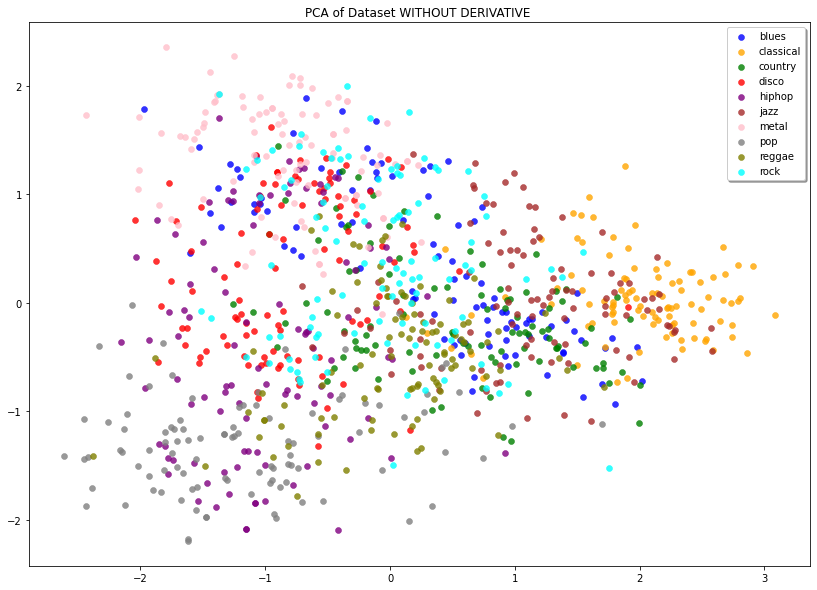

In [17]:
plotPca(x_nodelta, y, "WITHOUT DERIVATIVE")

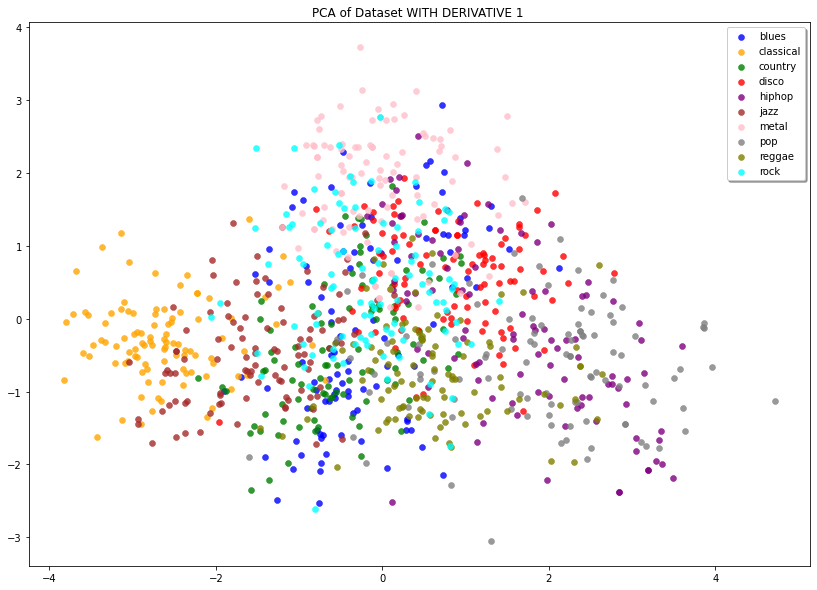

In [6]:
plotPca(x_wd1, y, "WITH DERIVATIVE 1")

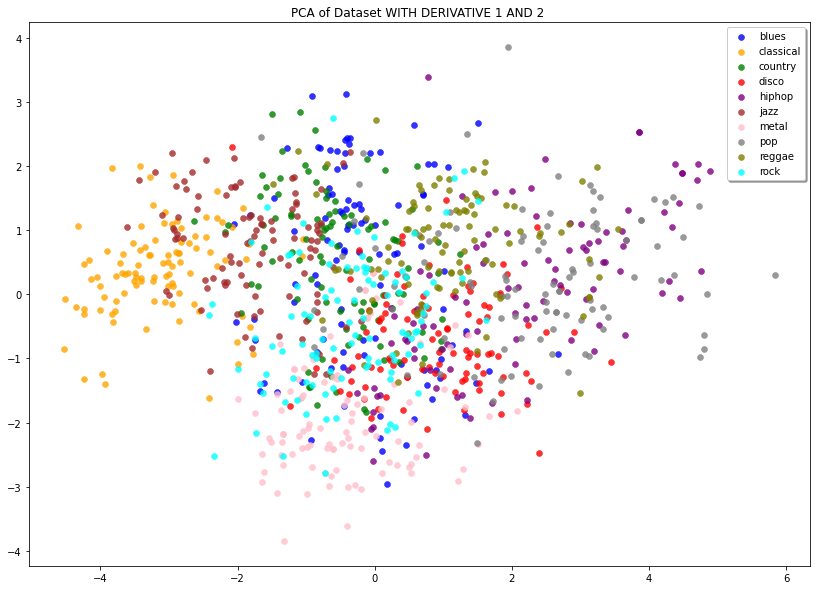

In [7]:
plotPca(x_wd1n2, y, "WITH DERIVATIVE 1 AND 2")

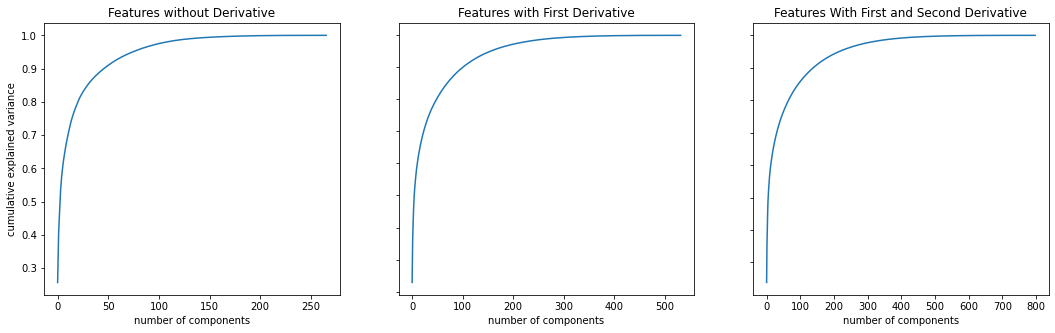

In [8]:
#PCA
pca_nodelta = sklearn.decomposition.PCA(whiten=True).fit(x_nodelta)
pca_wd1 = sklearn.decomposition.PCA(whiten=True).fit(x_wd1)
pca_wd1n2 = sklearn.decomposition.PCA(whiten=True).fit(x_wd1n2)

fig, axs = plt.subplots(1, 3, figsize= (18,5))
axs[0].plot(np.cumsum(pca_nodelta.explained_variance_ratio_))
axs[0].set_title('Features without Derivative')


axs[1].plot(np.cumsum(pca_wd1.explained_variance_ratio_))
axs[1].set_title('Features with First Derivative')


axs[2].plot(np.cumsum(pca_wd1n2.explained_variance_ratio_))
axs[2].set_title('Features With First and Second Derivative')

for ax in axs.flat:
    ax.set(xlabel='number of components', ylabel='cumulative explained variance')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [9]:
def pcaFitTransform(X, n_components):
    pca = sklearn.decomposition.PCA(n_components=n_components, whiten=True)
    pca.fit(X)
    X_pca = pca.transform(X)
    print("components: ",len(pca.explained_variance_ratio_))
    print("variance ratio: ", pca.explained_variance_ratio_)
    print("sum: ", sum(pca.explained_variance_ratio_))
    return X_pca

print("--Features Without Derivative")
x_nodelta_pca = pcaFitTransform(x_nodelta, 0.95)
print("\n--Features With Derivative 1")
x_wd1_pca = pcaFitTransform(x_wd1, 0.95)
print("\n--Features With Derivative 1 and 2")
x_wd1n2_pca = pcaFitTransform(x_wd1n2, 0.95)


--Features Without Derivative
components:  75
variance ratio:  [0.25717453 0.15105015 0.06831538 0.06219582 0.03761853 0.02811687
 0.0238423  0.01926905 0.01854337 0.01670721 0.01481159 0.0141726
 0.0135384  0.01262383 0.01112627 0.00980545 0.00946152 0.00852833
 0.00786129 0.00764259 0.0074554  0.00719312 0.00650942 0.00571118
 0.00538544 0.00522444 0.00496441 0.00467417 0.00452613 0.00432273
 0.0041141  0.00393944 0.00375773 0.00362907 0.00347325 0.00324354
 0.00316976 0.00309939 0.00298457 0.00286993 0.00278792 0.00278083
 0.00272912 0.0026092  0.00256512 0.00251586 0.00239349 0.00237237
 0.00229993 0.0022542  0.00222199 0.00218925 0.00212317 0.00209703
 0.00202727 0.00198444 0.0019543  0.00191163 0.00184197 0.00180059
 0.00172766 0.00171683 0.00162776 0.00157941 0.00154873 0.0015339
 0.00148057 0.00144083 0.00142307 0.00139422 0.00134451 0.00133582
 0.0013073  0.00128404 0.00125837]
sum:  0.950114996431315

--Features With Derivative 1
components:  155
variance ratio:  [0.22845579 

In [10]:
gridSearchResults(x_nodelta_pca, y, "nodelta_pca")
gridSearchResults(x_wd1_pca, y, "wd1_pca")
gridSearchResults(x_wd1n2_pca, y, "wd1n2_pca")

C:\Users\Deniz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


******************  nodelta_pca  ********************
             Classifier  Best Score  \
0     Nearest Neighbors       0.455   
1                   SVM       0.635   
2      Gaussian Process       0.337   
3         Decision Tree       0.384   
4         Random Forest       0.602   
5            Neural Net       0.635   
6              AdaBoost       0.275   
7           Naive Bayes       0.525   
8                   QDA       0.316   
9   Logistic Regression       0.617   
10  Linear Discriminant       0.656   

                                      Best Parameters  
0   {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}  
1   {'C': 5, 'degree': 3, 'gamma': 'scale', 'kerne...  
2                            {'max_iter_predict': 50}  
3   {'criterion': 'entropy', 'max_depth': 15, 'spl...  
4          {'criterion': 'gini', 'n_estimators': 150}  
5   {'activation': 'relu', 'hidden_layer_sizes': (...  
6                                {'n_estimators': 10}  
7                            

C:\Users\Deniz\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Deniz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


******************  wd1_pca  ********************
             Classifier  Best Score  \
0     Nearest Neighbors       0.326   
1                   SVM       0.634   
2      Gaussian Process       0.155   
3         Decision Tree       0.415   
4         Random Forest       0.588   
5            Neural Net       0.622   
6              AdaBoost       0.264   
7           Naive Bayes       0.540   
8                   QDA       0.168   
9   Logistic Regression       0.616   
10  Linear Discriminant       0.682   

                                      Best Parameters  
0   {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}  
1   {'C': 5, 'degree': 3, 'gamma': 'scale', 'kerne...  
2                            {'max_iter_predict': 50}  
3   {'criterion': 'gini', 'max_depth': 30, 'splitt...  
4       {'criterion': 'entropy', 'n_estimators': 200}  
5   {'activation': 'relu', 'hidden_layer_sizes': (...  
6                                {'n_estimators': 20}  
7                                

C:\Users\Deniz\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Deniz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


******************  wd1n2_pca  ********************
             Classifier  Best Score  \
0     Nearest Neighbors       0.286   
1                   SVM       0.605   
2      Gaussian Process       0.143   
3         Decision Tree       0.408   
4         Random Forest       0.579   
5            Neural Net       0.616   
6              AdaBoost       0.172   
7           Naive Bayes       0.527   
8                   QDA       0.165   
9   Logistic Regression       0.607   
10  Linear Discriminant       0.681   

                                      Best Parameters  
0   {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}  
1   {'C': 5, 'degree': 3, 'gamma': 'scale', 'kerne...  
2                            {'max_iter_predict': 50}  
3   {'criterion': 'gini', 'max_depth': 30, 'splitt...  
4          {'criterion': 'gini', 'n_estimators': 200}  
5   {'activation': 'logistic', 'hidden_layer_sizes...  
6                                {'n_estimators': 10}  
7                              

Accuracy:  0.656
Recall:  0.656
Precision:  0.6714157629570213
F1 Score :  0.6603873907005704
Cohens Kappa :  0.6177777777777778


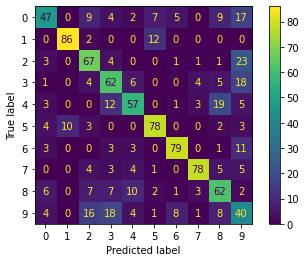

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, f1_score
from sklearn.model_selection import train_test_split

lda_clf = LinearDiscriminantAnalysis(solver='svd')

y_nodelta_pred = cross_val_predict(lda_clf, x_nodelta_pca, y, cv=5)
cm_nodelta = confusion_matrix(y, y_nodelta_pred)
disp_nodelta = ConfusionMatrixDisplay(confusion_matrix=cm_nodelta)
disp_nodelta.plot()
print("Accuracy: ",accuracy_score(y, y_nodelta_pred))
print("Recall: ",recall_score(y, y_nodelta_pred, average = 'macro'))
print("Precision: ",precision_score(y, y_nodelta_pred, average ='macro'))
print("F1 Score : ",f1_score(y, y_nodelta_pred, average='macro'))
print("Cohens Kappa : ",cohen_kappa_score(y, y_nodelta_pred))

Accuracy:  0.682
Recall:  0.6819999999999999
Precision:  0.6959791670436484
F1 Score :  0.685912354042781
Cohens Kappa :  0.6466666666666667


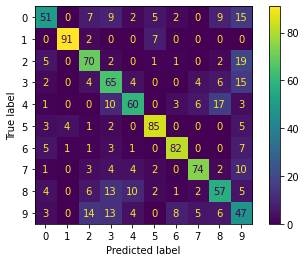

In [104]:
lda_clf = LinearDiscriminantAnalysis(solver='svd')

y_wd1_pred = cross_val_predict(lda_clf, x_wd1_pca, y, cv=5)
cm_wd1 = confusion_matrix(y, y_wd1_pred)
disp_wd1 = ConfusionMatrixDisplay(confusion_matrix=cm_wd1)
disp_wd1.plot()
print("Accuracy: ",accuracy_score(y, y_wd1_pred))
print("Recall: ",recall_score(y, y_wd1_pred, average = 'macro'))
print("Precision: ",precision_score(y, y_wd1_pred, average ='macro'))
print("F1 Score : ",f1_score(y, y_wd1_pred, average='macro'))
print("Cohens Kappa : ",cohen_kappa_score(y, y_wd1_pred))

Accuracy:  0.681
Recall:  0.6809999999999999
Precision:  0.6943744565664535
F1 Score :  0.6842152132279355
Cohens Kappa :  0.6466666666666667


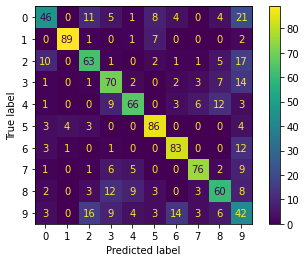

In [107]:
lda_clf = LinearDiscriminantAnalysis(solver='svd')

y_wd1n2_pred = cross_val_predict(lda_clf, x_wd1n2_pca, y, cv=5)
cm_wd1n2 = confusion_matrix(y, y_wd1n2_pred)
disp_wd1n2 = ConfusionMatrixDisplay(confusion_matrix=cm_wd1n2)
disp_wd1n2.plot()
print("Accuracy: ",accuracy_score(y, y_wd1n2_pred))
print("Recall: ",recall_score(y, y_wd1n2_pred, average = 'macro'))
print("Precision: ",precision_score(y, y_wd1n2_pred, average ='macro'))
print("F1 Score : ",f1_score(y, y_wd1n2_pred, average='macro'))
print("Cohens Kappa : ",cohen_kappa_score(y, y_wd1_pred))